This notebook will utilize the cleaned dataframe and work on feature extraction using tf-idf vectors and working on Machine Learning models on it.

In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

In [2]:
def load_and_clean_data(file_path):
    """Load data and handle all types of missing values"""
    df = pd.read_csv(file_path)
    
    print(f"Initial shape: {df.shape}")
    
    # Remove rows where any of the text columns have issues
    text_columns = ['text', 'text_tfidf', 'text_bert']
    
    for col in text_columns:
        if col in df.columns:
            # Remove NaN
            df = df[df[col].notna()]
            # Remove empty strings
            df = df[df[col] != '']
    
    print(f"Final shape after cleaning: {df.shape}")
    return df

df = load_and_clean_data('data/cleaned_df.csv')

Initial shape: (41563, 6)
Final shape after cleaning: (41544, 6)


In [3]:
print(df.isnull().sum())

text           0
label          0
text_length    0
word_count     0
text_tfidf     0
text_bert      0
dtype: int64


In [4]:
# Split for TF-IDF models (80% train, 20% test)
X = df['text_tfidf']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 33235
Test size: 8309


### Feature Extraction with TF-IDF

In [6]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),  # unigrams and bigrams
    min_df=1,            # ignore terms that appear in less than 1 document
    max_df=0.8,          # ignore terms that appear in more than 80% of documents
    stop_words='english'
)

In [7]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF features - Train: {X_train_tfidf.shape}, Test: {X_test_tfidf.shape}")

TF-IDF features - Train: (33235, 5000), Test: (8309, 5000)


## Models

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
results = {}
nb_model = MultinomialNB(alpha=1.0)
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)
nb_precision = precision_score(y_test,nb_pred)
nb_recall = recall_score(y_test, nb_pred)

results['Naive Bayes'] = {
    'model': nb_model,
    'predictions': nb_pred,
    'accuracy': nb_accuracy,
    'f1_score': nb_f1,
    'precision':nb_precision,
    'recall':nb_recall
}

print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"Naive Bayes F1-Score: {nb_f1:.4f}")
print(f"Naive Bayes Precision-Score: {nb_precision:.4f}")
print(f"Naive Bayes Recall-Score: {nb_recall:.4f}")

Naive Bayes Accuracy: 0.8996
Naive Bayes F1-Score: 0.9035
Naive Bayes Precision-Score: 0.8940
Naive Bayes Recall-Score: 0.9132


In [9]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test,lr_pred)
lr_recall = recall_score(y_test, lr_pred)

results['Logistic Regression'] = {
    'model': lr_model,
    'predictions': lr_pred,
    'accuracy': lr_accuracy,
    'f1_score': lr_f1,
    'precision':lr_precision,
    'recall':lr_recall
}

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Logistic Regression F1-Score: {lr_f1:.4f}")
print(f"Logistic Regression Precision-Score: {lr_precision:.4f}")
print(f"Logistic Regression Recall-Score: {lr_recall:.4f}")

Logistic Regression Accuracy: 0.9115
Logistic Regression F1-Score: 0.9128
Logistic Regression Precision-Score: 0.9259
Logistic Regression Recall-Score: 0.9001


In [10]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_precision = precision_score(y_test,svm_pred)
svm_recall = recall_score(y_test, svm_pred)

results['SVM'] = {
    'model': svm_model,
    'predictions': svm_pred,
    'accuracy': svm_accuracy,
    'f1_score': svm_f1,
    'precision':svm_precision,
    'recall':svm_recall
}

print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"SVM F1-Score: {svm_f1:.4f}")
print(f"SVM Precision-Score: {svm_precision:.4f}")
print(f"SVM Recall-Score: {svm_recall:.4f}")

SVM Accuracy: 0.9171
SVM F1-Score: 0.9181
SVM Precision-Score: 0.9331
SVM Recall-Score: 0.9036


In [11]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()]
})

print("\nPerformance Comparison:")
print(comparison_df.to_string(index=False))


Performance Comparison:
              Model  Accuracy  F1-Score  Precision   Recall
        Naive Bayes  0.899627  0.903517   0.894002 0.913237
Logistic Regression  0.911542  0.912842   0.925908 0.900140
                SVM  0.917078  0.918142   0.933108 0.903648


In [12]:
for model_name in results.keys():
    print(f"\n{model_name}:")
    print(classification_report(y_test, results[model_name]['predictions'], 
                                target_names=['Negative', 'Positive']))


Naive Bayes:
              precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      4033
    Positive       0.89      0.91      0.90      4276

    accuracy                           0.90      8309
   macro avg       0.90      0.90      0.90      8309
weighted avg       0.90      0.90      0.90      8309


Logistic Regression:
              precision    recall  f1-score   support

    Negative       0.90      0.92      0.91      4033
    Positive       0.93      0.90      0.91      4276

    accuracy                           0.91      8309
   macro avg       0.91      0.91      0.91      8309
weighted avg       0.91      0.91      0.91      8309


SVM:
              precision    recall  f1-score   support

    Negative       0.90      0.93      0.92      4033
    Positive       0.93      0.90      0.92      4276

    accuracy                           0.92      8309
   macro avg       0.92      0.92      0.92      8309
weighted avg       0.92      0.9

## Visualizations

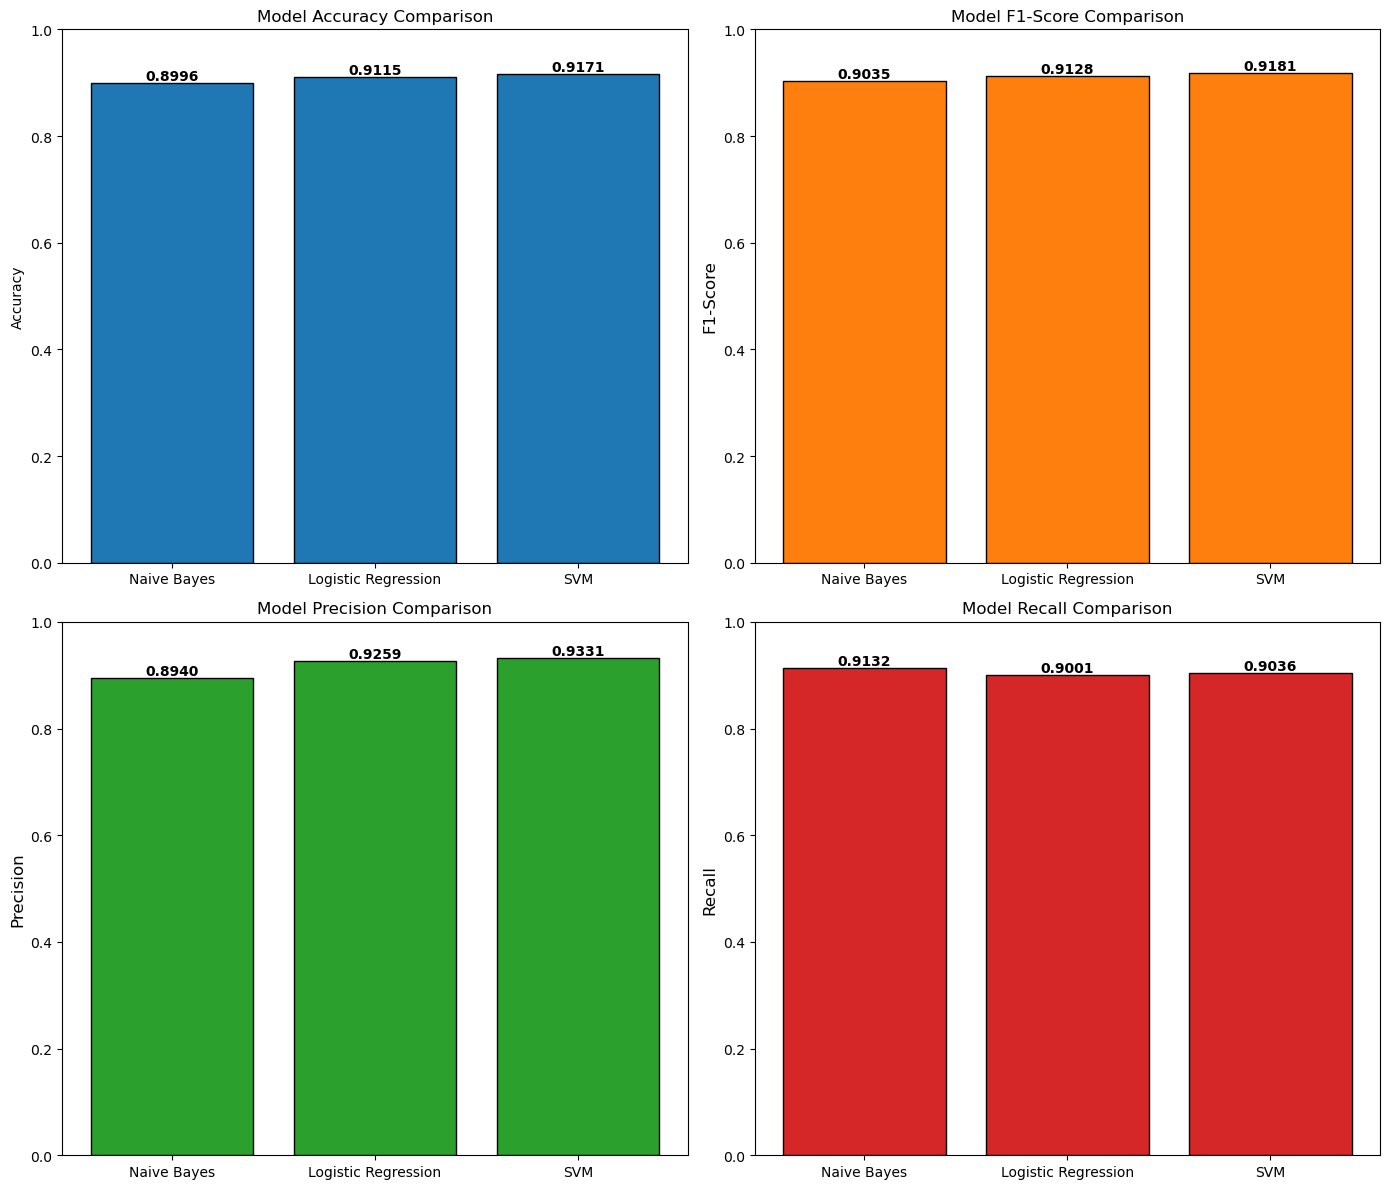

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
#Accuracy Plot
models = comparison_df['Model']
accuracies = comparison_df['Accuracy']
bars = axes[0,0].bar(models, accuracies,color= '#1f77b4',edgecolor='black')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_title('Model Accuracy Comparison')
axes[0,0].set_ylim([0.0, 1.0])
for bar in bars:
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom',fontweight='bold')

# f1 score plot
f1_scores = comparison_df['F1-Score']
bars = axes[0,1].bar(models, f1_scores, color= '#ff7f0e', edgecolor='black')
axes[0,1].set_ylabel('F1-Score', fontsize=12)
axes[0,1].set_title('Model F1-Score Comparison')
axes[0,1].set_ylim([0.0, 1.0])
for bar in bars:
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom',fontweight='bold')

# precision plot
precision_scores = comparison_df['Precision']
bars = axes[1,0].bar(models, precision_scores, color= '#2ca02c', edgecolor='black')
axes[1,0].set_ylabel('Precision', fontsize=12)
axes[1,0].set_title('Model Precision Comparison')
axes[1,0].set_ylim([0.0, 1.0])
for bar in bars:
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom',fontweight='bold')

#recall plot
recall_scores = comparison_df['Recall']
bars = axes[1,1].bar(models, recall_scores, color= '#d62728', edgecolor='black')
axes[1,1].set_ylabel('Recall', fontsize=12)
axes[1,1].set_title('Model Recall Comparison')
axes[1,1].set_ylim([0.0, 1.0])
for bar in bars:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('ml_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

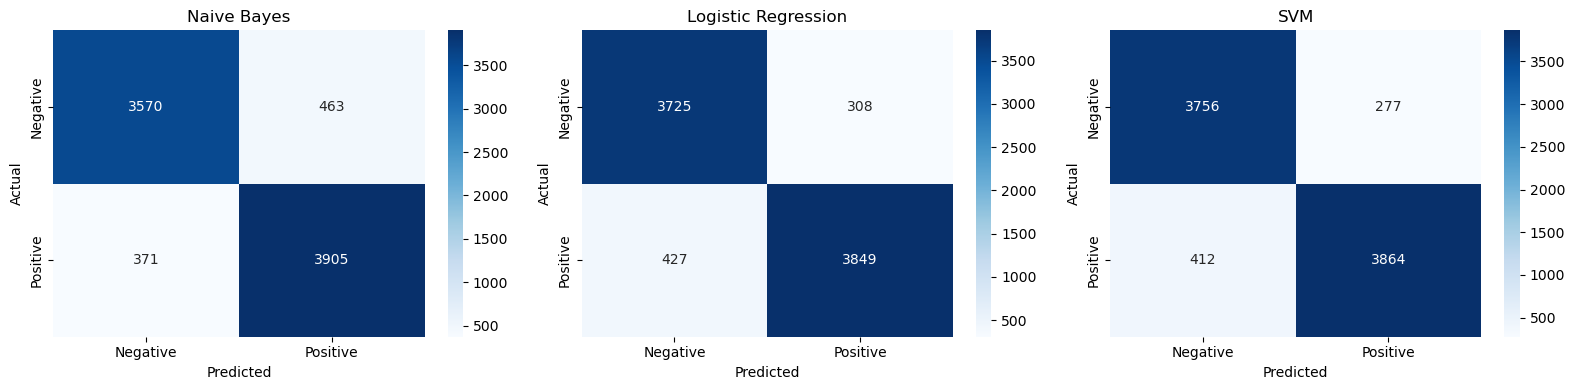

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
cm_models = ['Naive Bayes', 'Logistic Regression', 'SVM']

for idx, (ax, model_name) in enumerate(zip(axes, cm_models)):
    cm = confusion_matrix(y_test, results[model_name]['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    
    ax.set_title(f'{model_name}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

plt.tight_layout()
plt.savefig('ml_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

### Rule Based Sentiment Analysis

Rule-based Accuracy: 0.7851

Rule-based Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.78      0.78      4033
    Positive       0.79      0.79      0.79      4276

    accuracy                           0.79      8309
   macro avg       0.78      0.78      0.78      8309
weighted avg       0.79      0.79      0.79      8309



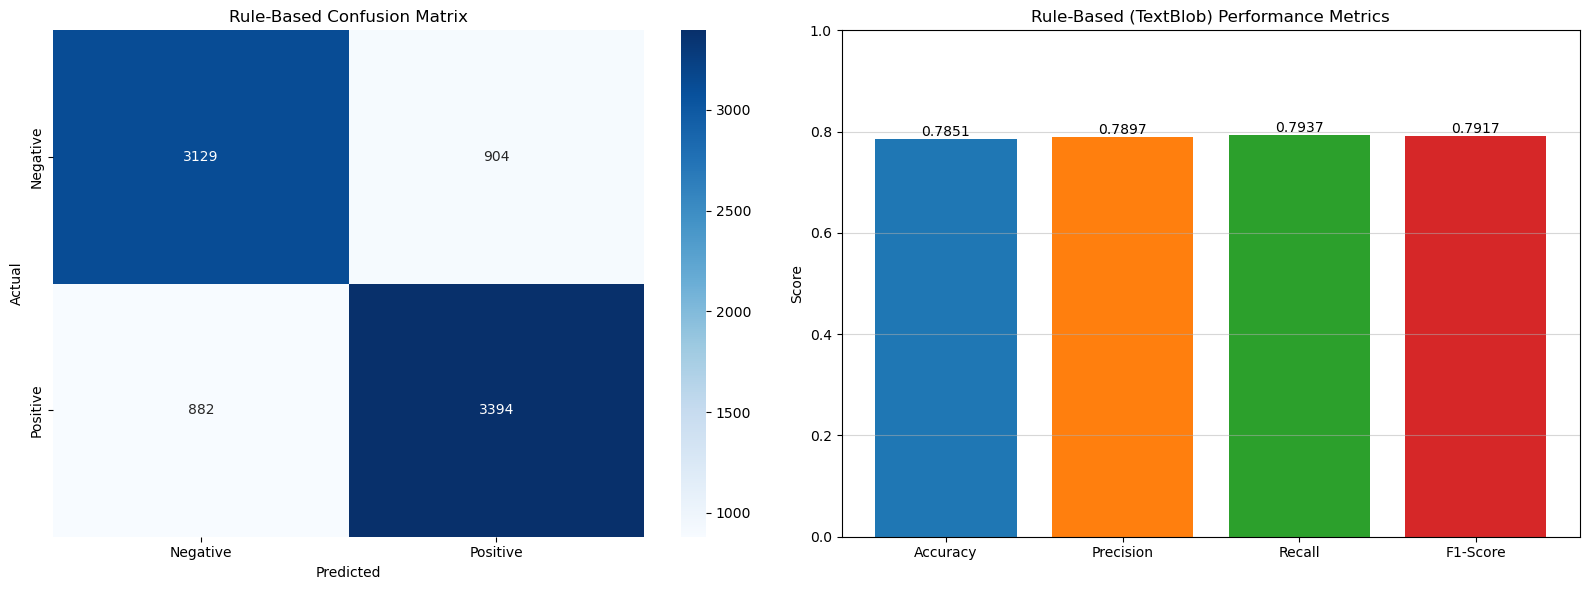

In [19]:
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon if needed
try:
    nltk.download('vader_lexicon', quiet=True)
except:
    print("VADER lexicon download failed, but will try to use if already available")

class RuleBasedSentiment:
    def __init__(self):
        try:
            self.sia = SentimentIntensityAnalyzer()
            self.vader_available = True
        except:
            self.vader_available = False
            print("VADER not available, using TextBlob only")
        
    def textblob_analysis(self, text):
        """Analyze sentiment using TextBlob"""
        try:
            analysis = TextBlob(str(text))
            return analysis.sentiment.polarity
        except:
            return 0.0
    
    def vader_analysis(self, text):
        """Analyze sentiment using VADER"""
        if not self.vader_available:
            return 0.0
        try:
            scores = self.sia.polarity_scores(str(text))
            return scores['compound']
        except:
            return 0.0
    
    def predict(self, text):
        """Combine both approaches for final prediction"""
        textblob_score = self.textblob_analysis(text)
        
        if self.vader_available:
            vader_score = self.vader_analysis(text)
            # Weighted combination
            combined_score = 0.3 * textblob_score + 0.7 * vader_score
        else:
            combined_score = textblob_score
        
        # Convert to binary classification (1 for positive, 0 for negative)
        return 1 if combined_score > 0 else 0

# Initialize and test rule-based approach
rule_based = RuleBasedSentiment()

# Predict on test set (using the cleaned test data)
y_pred_rule = [rule_based.predict(text) for text in X_test]

# Evaluate rule-based approach
rule_accuracy = accuracy_score(y_test, y_pred_rule)
rule_precision = precision_score(y_test, y_pred_rule)
rule_recall = recall_score(y_test, y_pred_rule)
rule_f1 = f1_score(y_test, y_pred_rule)

test_acc = rule_accuracy
test_precision = rule_precision
test_recall = rule_recall
test_f1 = rule_f1

print(f"Rule-based Accuracy: {rule_accuracy:.4f}")
print("\nRule-based Classification Report:")
print(classification_report(y_test, y_pred_rule, target_names=['Negative', 'Positive']))

#acc plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
cm = confusion_matrix(y_test, y_pred_rule)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
axes[0].set_title('Rule-Based Confusion Matrix')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [test_acc, test_precision, test_recall, test_f1]
bars = axes[1].bar(metrics_names, metrics_values, 
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
axes[1].set_ylabel('Score')
axes[1].set_title('Rule-Based (TextBlob) Performance Metrics')
axes[1].set_ylim([0, 1])
axes[1].grid(True, alpha=0.5, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
              f'{height:.4f}',
              ha='center', va='bottom')

plt.tight_layout()
plt.savefig('rule_based_metrics.png', dpi=300, bbox_inches='tight')
plt.show()